In [5]:
import pandas as pd
import numpy as np
import altair as alt

# Exploratory Data Analysis:

## 1. Data Overview:

In [6]:
data = pd.read_csv('milknew_raw.csv')
data_overview = {
    "Dataset Size": data.shape,
    "Data Types": data.dtypes.to_dict(),
    "Summary Statistics": data.describe()
}
data_overview

{'Dataset Size': (1059, 8),
 'Data Types': {'pH': dtype('float64'),
  'Temprature': dtype('int64'),
  'Taste': dtype('int64'),
  'Odor': dtype('int64'),
  'Fat ': dtype('int64'),
  'Turbidity': dtype('int64'),
  'Colour': dtype('int64'),
  'Grade': dtype('O')},
 'Summary Statistics':                 pH   Temprature        Taste         Odor         Fat   \
 count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
 mean      6.630123    44.226629     0.546742     0.432483     0.671388   
 std       1.399679    10.098364     0.498046     0.495655     0.469930   
 min       3.000000    34.000000     0.000000     0.000000     0.000000   
 25%       6.500000    38.000000     0.000000     0.000000     0.000000   
 50%       6.700000    41.000000     1.000000     0.000000     1.000000   
 75%       6.800000    45.000000     1.000000     1.000000     1.000000   
 max       9.500000    90.000000     1.000000     1.000000     1.000000   
 
          Turbidity       Colour  
 cou

There are  1059 observations in this data set.

Numerical columns are:
* index, pH, Temperature, Taste, Odor, Fat, Turbidity and Color

Categorical variables are: 
* Taste, Odor,Fat, Turbidity


## 2. Data Cleaning and Preprocessing:
* Checking for missing values

In [7]:
missing_values = data.isnull().sum()
missing_values

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

<Axes: >

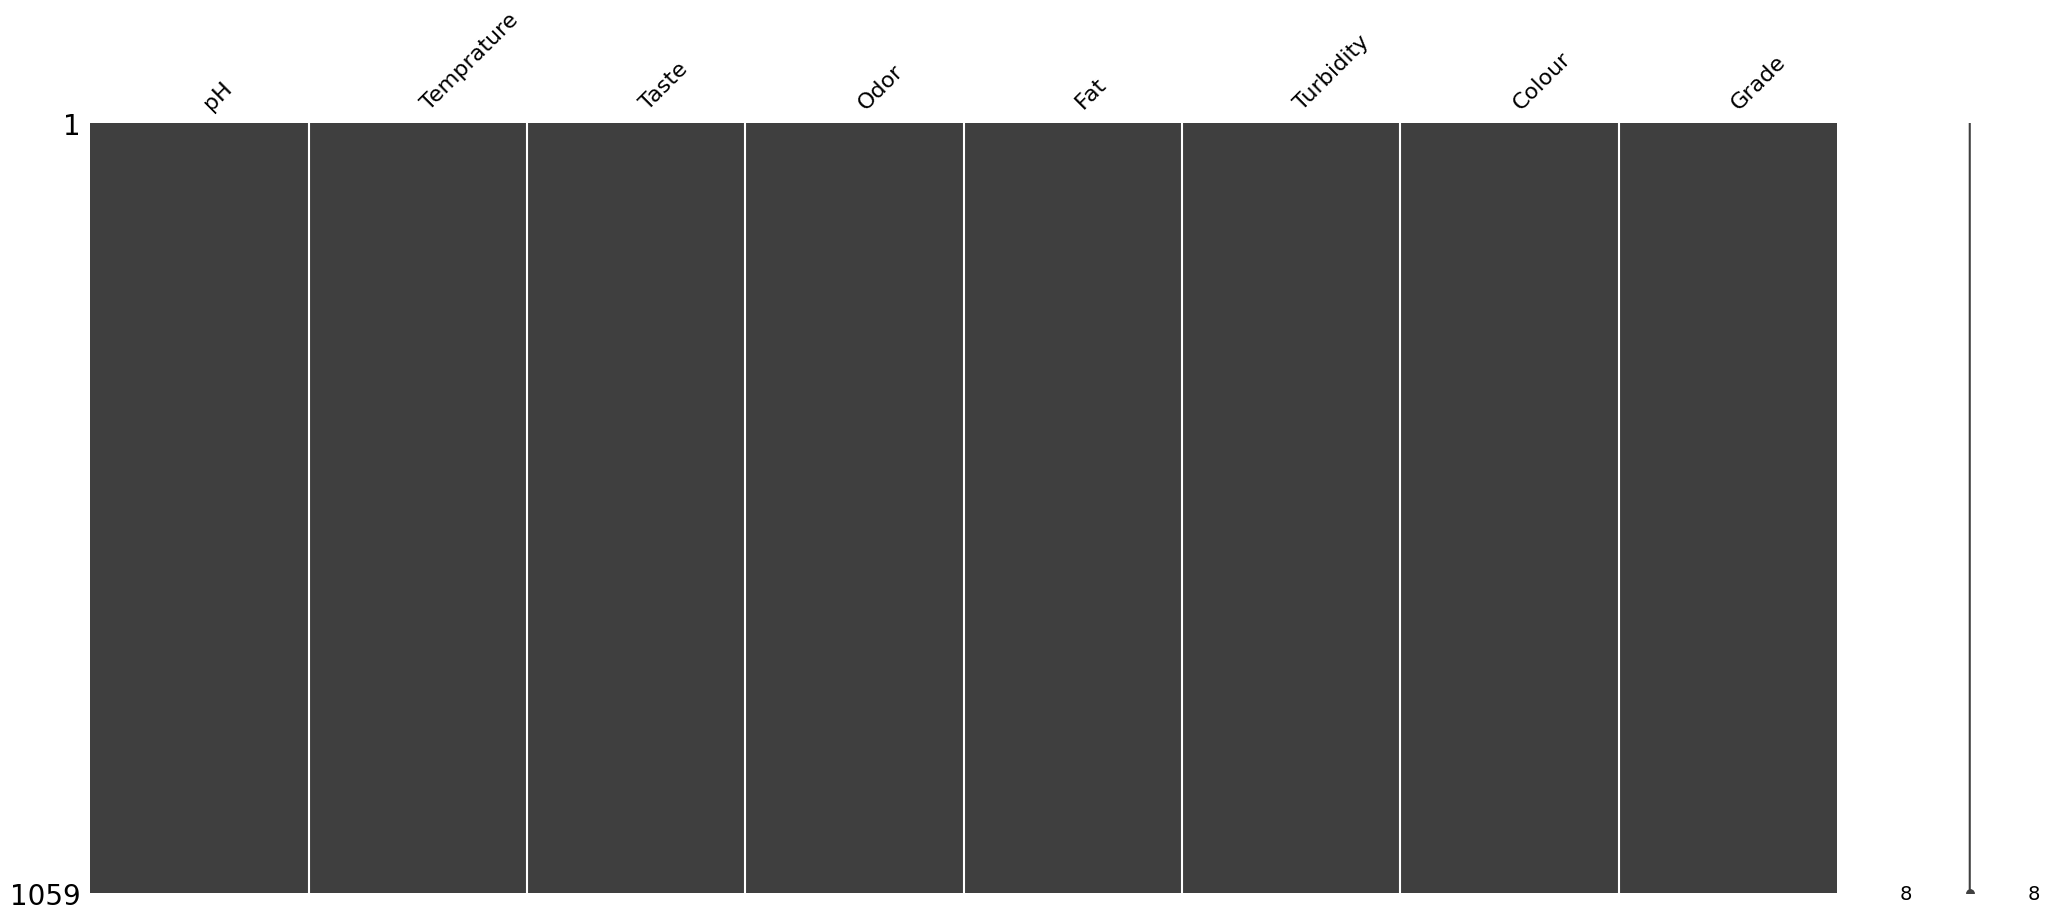

In [8]:
import missingno as msno
msno.matrix(data)

There are no missing values in this data set. 

## 3. Univariate Analysis
* Distribution of each feature using the density kernal plots

In [9]:

categorical_columns = ['Taste','Odor','Fat ','Turbidity']
numerical_columns = ['pH','Temprature','Colour']


def create_plot(column):
    if column in categorical_columns:
        # Create a bar chart for categorical data
        return alt.Chart(data).mark_bar().encode(
            x=alt.X(f'{column}:N', sort='-y'),
            y=alt.Y('count():Q'),
            tooltip=[alt.Tooltip(f'{column}:N'), alt.Tooltip('count():Q')]
        ).properties(
            width=200,
            height=150,
            title=f'Distribution of {column}'
        )
    elif column in numerical_columns:
        # Create a KDE plot for numerical data
        return alt.Chart(data).transform_density(
            density=column,
            as_=[column, 'density'],
            extent=[data[column].min(), data[column].max()],
            bandwidth=(data[column].max() - data[column].min()) / 30  # Bandwidth heuristic
        ).mark_line().encode(
            x=alt.X(f'{column}:Q'),
            y=alt.Y('density:Q'),
            tooltip=[alt.Tooltip(f'{column}:Q'), alt.Tooltip('density:Q')]
        ).properties(
            width=200,
            height=150,
            title=f'Density of {column}'
        )

# Create the plots for each column
plots = [create_plot(col) for col in categorical_columns + numerical_columns]

# Concatenate all plots into one chart
composite_chart = alt.hconcat(*plots)

composite_chart


alt.HConcatChart(...)

In [10]:
import altair as alt

# Assuming 'data' is a Pandas DataFrame that contains the necessary columns

# Create the plots for each column
categorical_plots = [create_plot(col) for col in categorical_columns]
numerical_plots = [create_plot(col) for col in numerical_columns]

# Concatenate the categorical plots horizontally
categorical_row = alt.hconcat(*categorical_plots)

# Concatenate the numerical plots horizontally
numerical_row = alt.hconcat(*numerical_plots)

# Concatenate the two rows vertically
composite_chart = alt.vconcat(categorical_row, numerical_row)

# Display the composite chart
composite_chart


alt.VConcatChart(...)

In [11]:
import altair as alt

# Assuming 'data' is a Pandas DataFrame that contains the necessary columns

def create_plot(column):
    if column in categorical_columns:
        # Create a bar chart for categorical data with refined axis titles
        return alt.Chart(data).mark_bar().encode(
            x=alt.X(f'{column}:N', sort='-y', axis=alt.Axis(title=column)),
            y=alt.Y('count():Q', axis=alt.Axis(title='Count')),
            tooltip=[alt.Tooltip(f'{column}:N'), alt.Tooltip('count():Q')]
        ).properties(
            width=200,
            height=150,
            title=f'Distribution of {column}'
        )
    elif column in numerical_columns:
        # Create a KDE plot for numerical data with refined axis titles
        return alt.Chart(data).transform_density(
            density=column,
            as_=[column, 'density'],
            extent=[data[column].min(), data[column].max()],
            bandwidth=(data[column].max() - data[column].min()) / 30  # Bandwidth heuristic
        ).mark_line().encode(
            x=alt.X(f'{column}:Q', axis=alt.Axis(title=column)),
            y=alt.Y('density:Q', axis=alt.Axis(title='Density')),
            tooltip=[alt.Tooltip(f'{column}:Q'), alt.Tooltip('density:Q')]
        ).properties(
            width=200,
            height=150,
            title=f'Density of {column}'
        )

# Create the plots for each column
categorical_plots = [create_plot(col) for col in categorical_columns]
numerical_plots = [create_plot(col) for col in numerical_columns]

# Concatenate the categorical plots horizontally
categorical_row = alt.hconcat(*categorical_plots).resolve_scale(y='independent')

# Concatenate the numerical plots horizontally
numerical_row = alt.hconcat(*numerical_plots).resolve_scale(y='independent')

# Concatenate the two rows vertically and add an overall title
composite_chart = alt.vconcat(categorical_row, numerical_row)

# Display the composite chart
composite_chart


alt.VConcatChart(...)

The density plots and histograms show the distribution of each feature. We can see that pH, Temperature, and Colour are quantitative features with varying distributions. For instance, the pH values are slightly skewed towards lower values. The binary features (Taste, Odor, Fat, Turbidity) show the counts of 1s and 0s, indicating satisfactory and unsatisfactory ratings, respectively.

In [12]:
# Define the list of numerical columns for which to create box plots
numerical_columns = ['pH', 'Temprature', 'Colour']

# Create the base box plot
base_boxplot = alt.Chart(data).mark_boxplot(size=50).encode(
    y=alt.Y(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
     tooltip=[alt.Tooltip(alt.repeat("column"), type='quantitative')]
).properties(
    width=180,
    height=300
)

# Use alt.repeat() to create box plots for the specified columns
box_plot_chart = base_boxplot.repeat(
    column=numerical_columns
).properties(
    title='Box Plots of Numerical Features'
)

# Display the chart
box_plot_chart

alt.RepeatChart(...)

The boxplots reveal potential outliers in several features, particularly in 'Temperature'. This could be important for certain models sensitive to outliers.

## 4. Bivariate Analysis

In [13]:
# Correlation matrix
correlation_matrix = data.corr().reset_index().melt('index')


# Create the heatmap
heatmap = alt.Chart(correlation_matrix).mark_rect().encode(
    x=alt.X('index:O', title=None),
    y=alt.Y('variable:O', title=None),
    color=alt.Color('value:Q', scale=alt.Scale(scheme='blues', domain=(-1, 1))),
    tooltip=[
        alt.Tooltip('index:O', title='Variable 1'),
        alt.Tooltip('variable:O', title='Variable 2'),
        alt.Tooltip('value:Q', title='Correlation')
    ]
).properties(
    width=500,
    height=400,
    title='Correlation Matrix'
)

# Create text annotations
text = alt.Chart(correlation_matrix).mark_text().encode(
    x='index:O',
    y='variable:O',
    text=alt.Text('value:Q', format=".2f"),  # Format the correlation values to two decimal places
    color=alt.value('black')  # Set the text color; change as needed for visibility
)

# Layer heatmap and text
final_chart = alt.layer(heatmap, text).properties(
    title='Correlation Matrix'
)

# Display the chart
final_chart

/var/folders/pk/263cmy6n21j3y3cqybw1dwq40000gn/T/ipykernel_39172/3626176002.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().reset_index().melt('index')


alt.LayerChart(...)

In [14]:
import altair as alt
# Assuming 'data' is your DataFrame and it's already defined

# Calculate the Spearman correlation matrix and melt it for Altair
correlation_matrix = data.corr(method='spearman').reset_index().melt('index')

# Create the heatmap
heatmap = alt.Chart(correlation_matrix).mark_rect().encode(
    x=alt.X('index:O', title=None),
    y=alt.Y('variable:O', title=None),
    color=alt.Color('value:Q', scale=alt.Scale(scheme='blueorange', domain=(-1, 1))),
    tooltip=[
        alt.Tooltip('index:O', title='Variable 1'),
        alt.Tooltip('variable:O', title='Variable 2'),
        alt.Tooltip('value:Q', title='Correlation (Spearman)')
    ]
).properties(
    width=500,
    height=400,
    title='Spearman Correlation Matrix'
)

# Create text annotations with conditional color for better visibility
text = alt.Chart(correlation_matrix).mark_text().encode(
    x='index:O',
    y='variable:O',
    text=alt.Text('value:Q', format=".2f"),
    color=alt.condition(
        alt.datum.value > 0.5 | (alt.datum.value < -0.5),
        alt.value('white'),  # Use white text for strong correlations
        alt.value('black')   # Use black text for weak correlations
    )
)

# Layer heatmap and text for the final visualization
final_chart = alt.layer(heatmap, text).properties(
    title='Spearman Correlation Matrix'
)

# Display the chart
final_chart



/var/folders/pk/263cmy6n21j3y3cqybw1dwq40000gn/T/ipykernel_39172/2007492170.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr(method='spearman').reset_index().melt('index')


alt.LayerChart(...)

The heatmap of the correlation matrix shows the relationships between different features. Note that some features show moderate correlations with each other, which could be relevant for certain models. The absence of very high correlations suggests that multicollinearity might not be a significant issue for this dataset.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


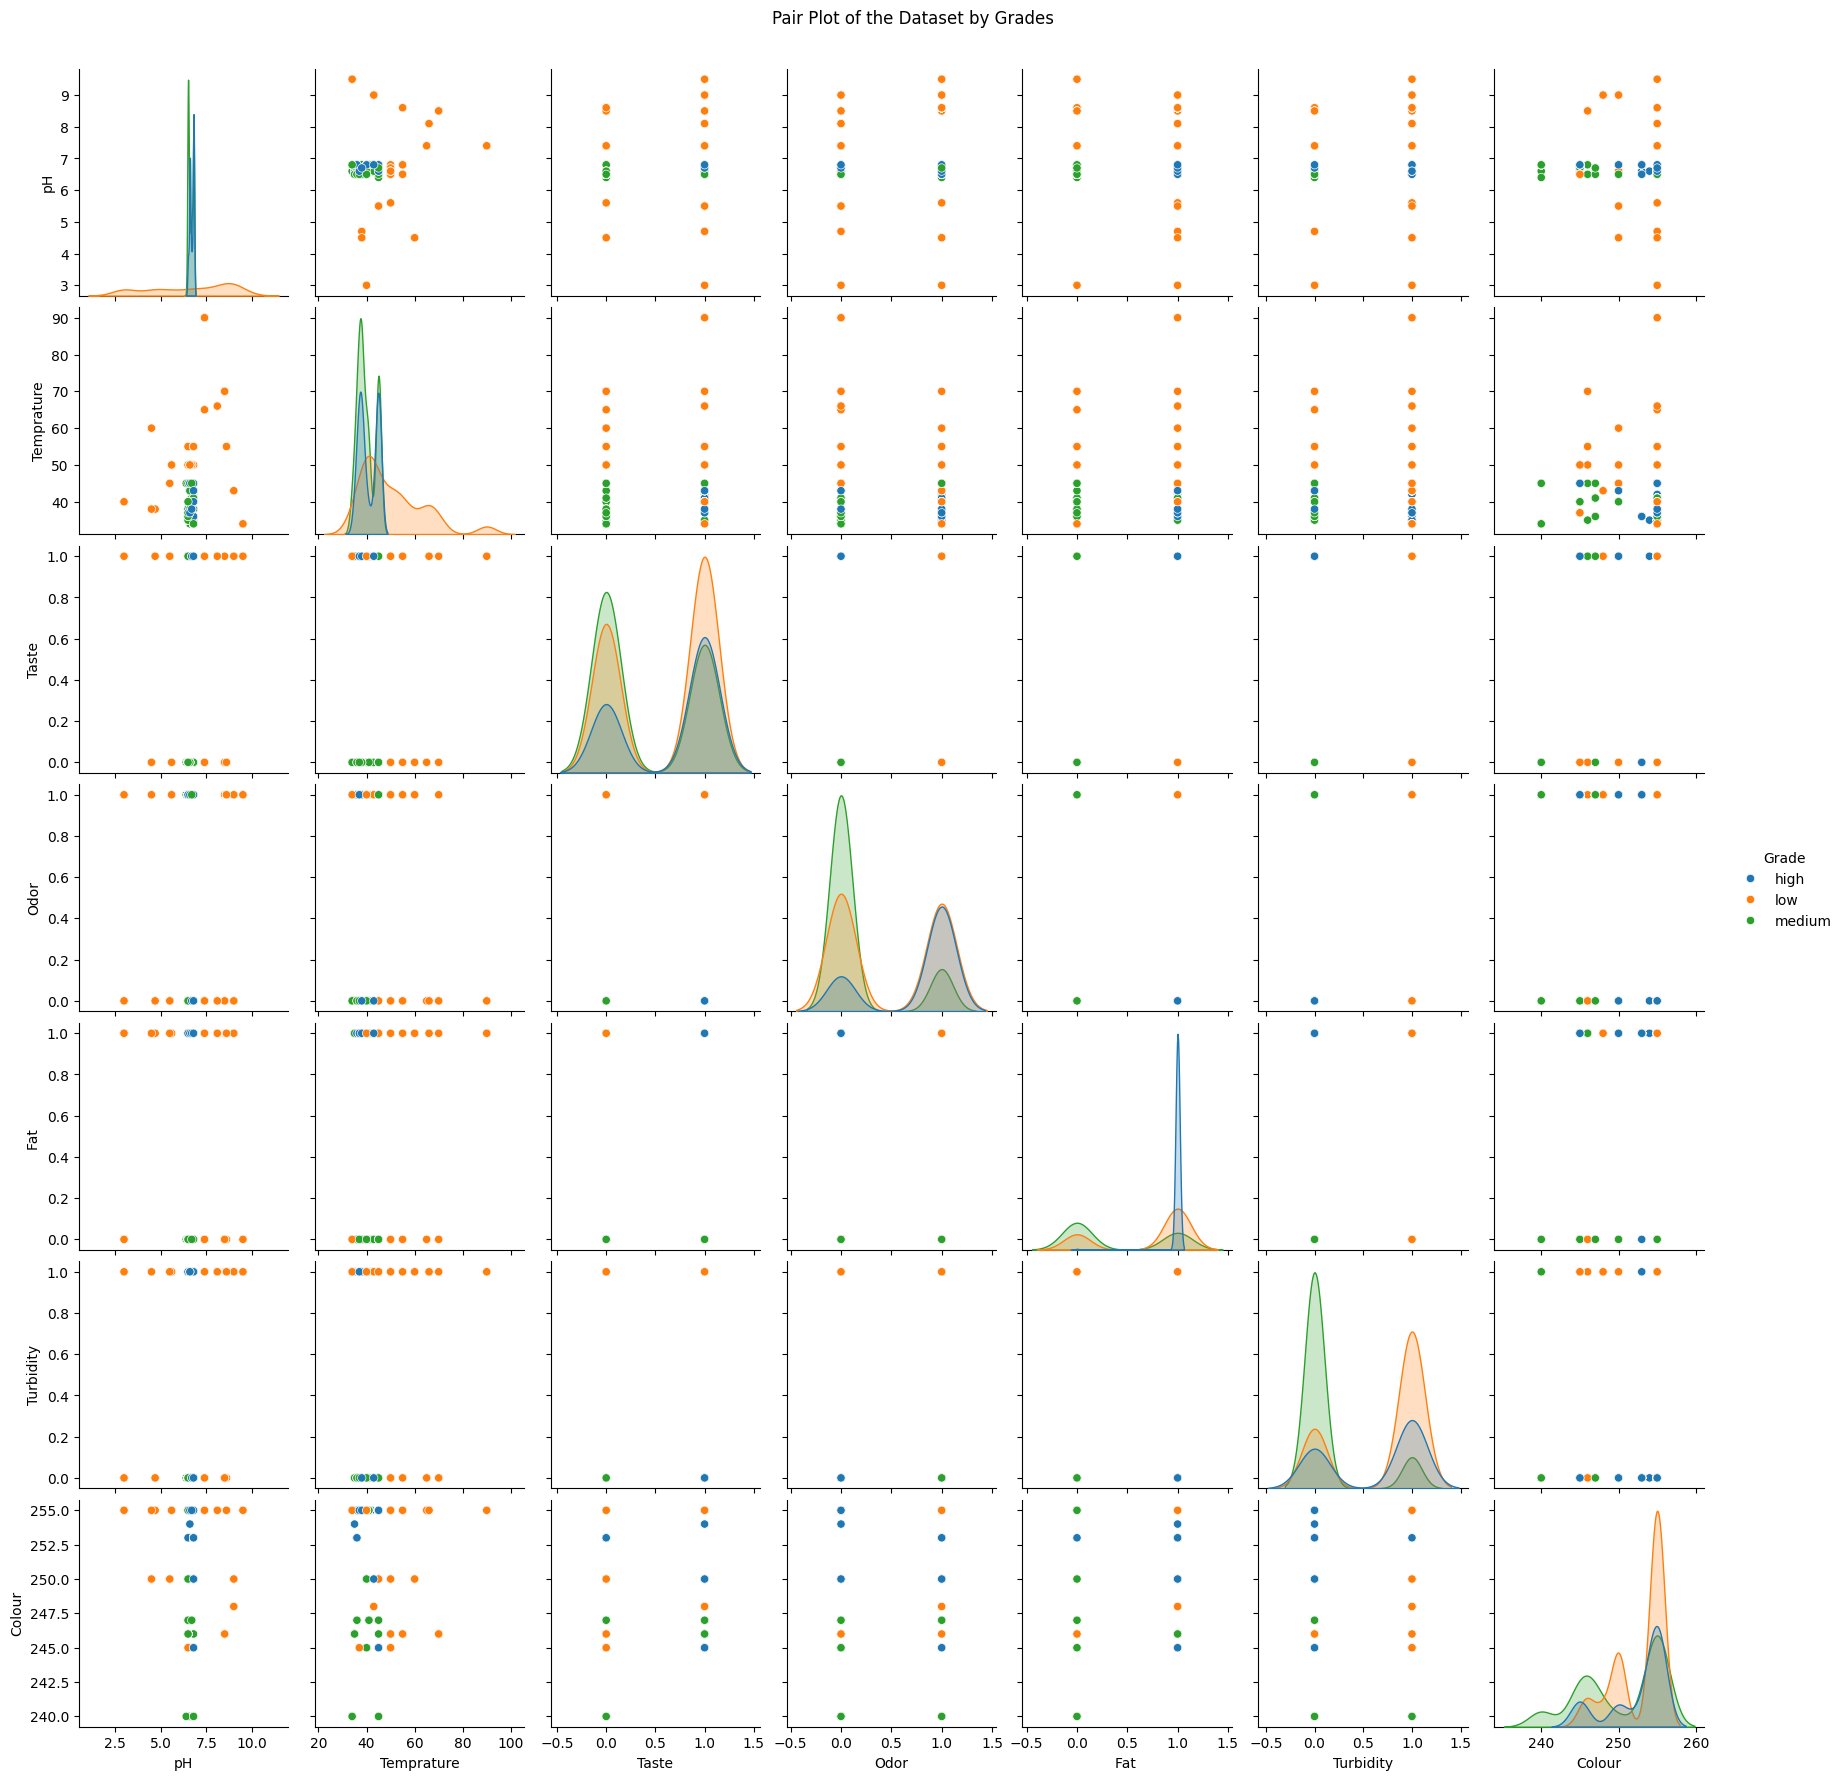

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the pair plot with color for 'Grade'
pair_plot = sns.pairplot(data, hue='Grade', diag_kind='kde')

# Customize the plot
pair_plot.fig.suptitle("Pair Plot of the Dataset by Grades", y=1.02)

# Display the plot
plt.show()

In [17]:
# Define the list of numerical columns
numerical_columns = ['pH', 'Temprature', 'Colour']

# Function to create a box plot for each column
def make_boxplot(column):
    return alt.Chart(data).mark_boxplot(size=50).encode(
        x='Grade:N',
        y=alt.Y(f'{column}:Q', title=f'{column}'),
        color='Grade:N'
    ).properties(
        width=200,
        height=300,
        title=f'Boxplot of {column} by Grade'
    )

# Concatenate box plots for each numerical column
boxplots = alt.hconcat(*[make_boxplot(col) for col in numerical_columns], spacing=30)

boxplots

alt.HConcatChart(...)

The boxplots of features against the milk grade (target variable) provide insights into how different grades vary with each feature. For instance, we can observe differences in distributions of pH, Temperature, and Colour across different milk grades.
This analysis is important for understanding which features might be significant predictors for the classification of milk quality.

Given the nature of the data, models like Logistic Regression, Decision Trees, or Random Forests could be good starting points.
The performance of these models could be initially assessed using cross-validation.

Let's start by splitting the data into features (X) and target (y), and then set up a basic cross-validation.

In [19]:
train_82 = pd.read_csv('x_train_82.csv')
test_82 = pd.read_csv('x_test_82.csv')

#train_73 = pd.read_csv('x_train_73.csv')
#test_73 = pd.read_csv('x_test_73.csv')


KNN - Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
KNN - Accuracy: 0.9952830188679245, Precision: 0.9953372370418564, Recall: 0.9952830188679245, F1-Score: 0.9952733003696268


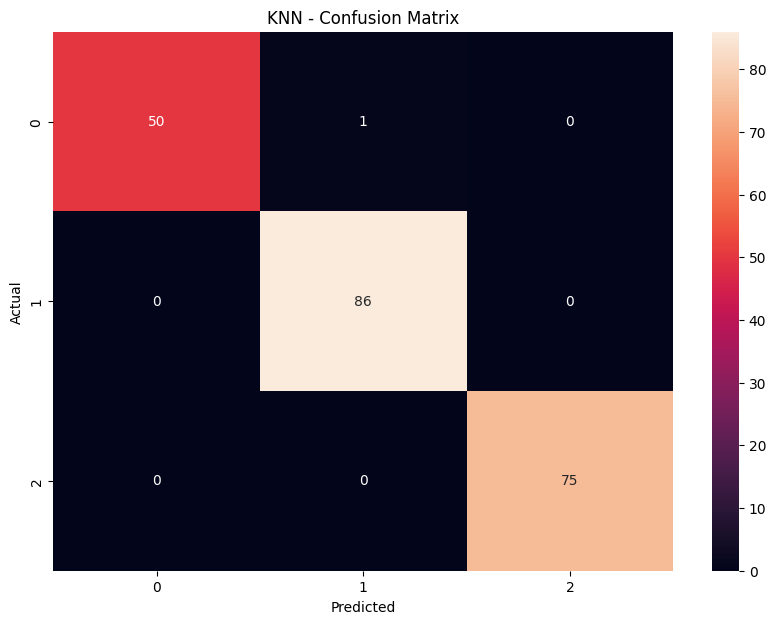

LDA - Best Parameters: {}
LDA - Accuracy: 0.7122641509433962, Precision: 0.7278365281380144, Recall: 0.7122641509433962, F1-Score: 0.7089007881843102


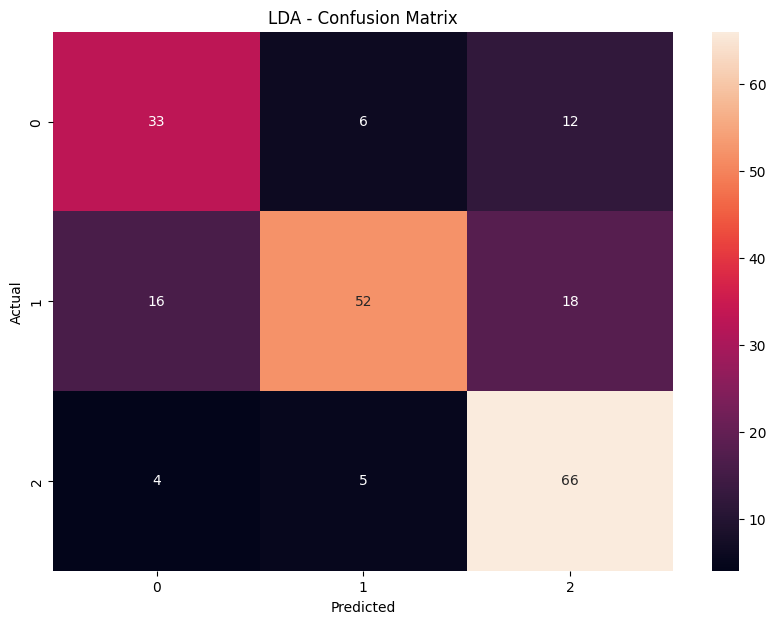

QDA - Best Parameters: {'reg_param': 0.0}
QDA - Accuracy: 0.9858490566037735, Precision: 0.9860386006889892, Recall: 0.9858490566037735, F1-Score: 0.9858463937257678


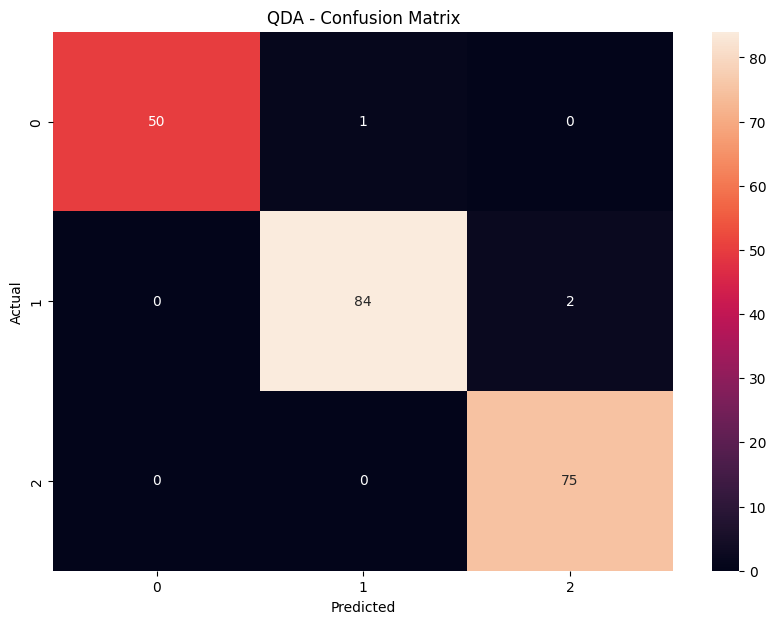

Naive Bayes - Best Parameters: {'var_smoothing': 0.1}
Naive Bayes - Accuracy: 0.9198113207547169, Precision: 0.9266348516399978, Recall: 0.9198113207547169, F1-Score: 0.9207516752384125


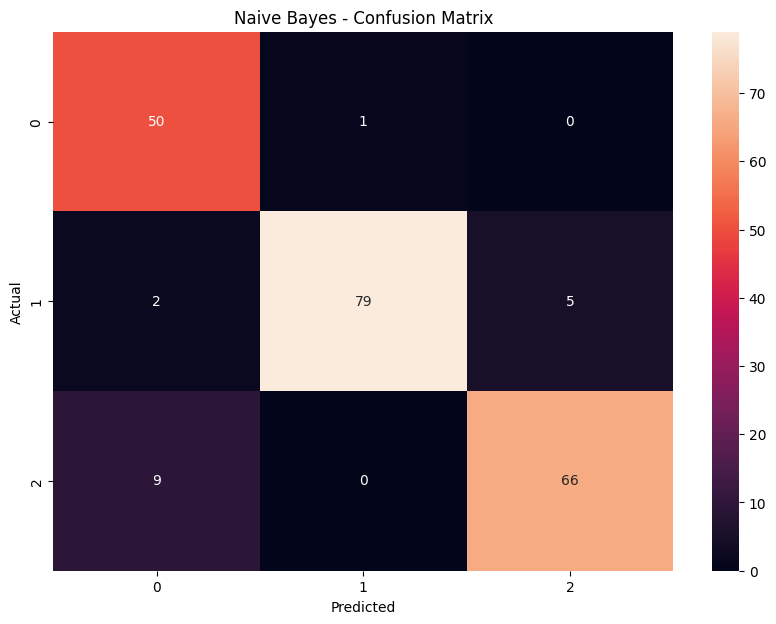

Logistic Regression - Best Parameters: {'C': 1, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression - Accuracy: 0.8443396226415094, Precision: 0.8605217996441499, Recall: 0.8443396226415094, F1-Score: 0.8476045360136956


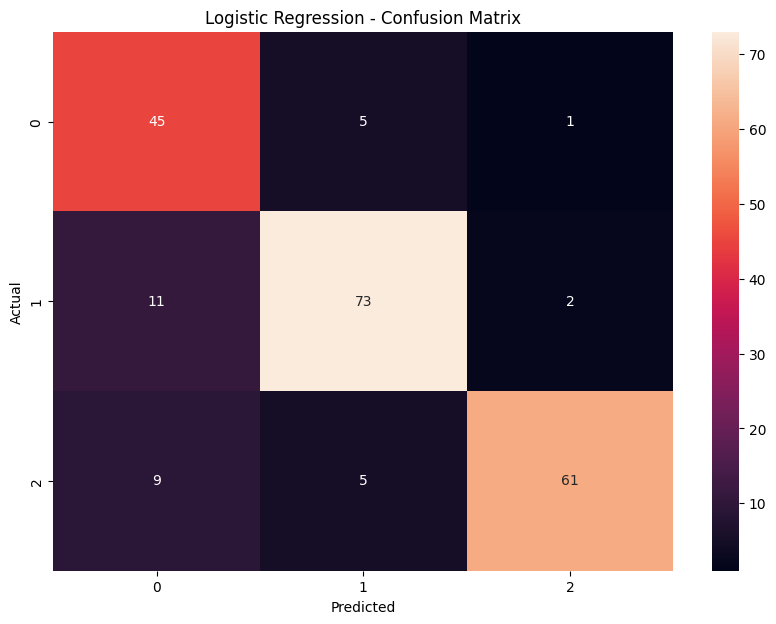

Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Accuracy: 0.9952830188679245, Precision: 0.9953450844091359, Recall: 0.9952830188679245, F1-Score: 0.9952752866190029


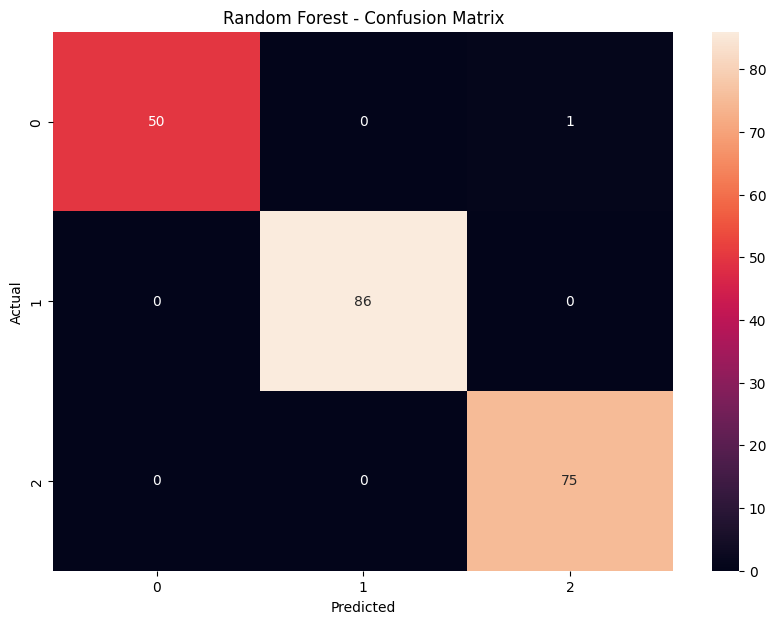

SVM - Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
SVM - Accuracy: 0.9952830188679245, Precision: 0.9953450844091359, Recall: 0.9952830188679245, F1-Score: 0.9952752866190029


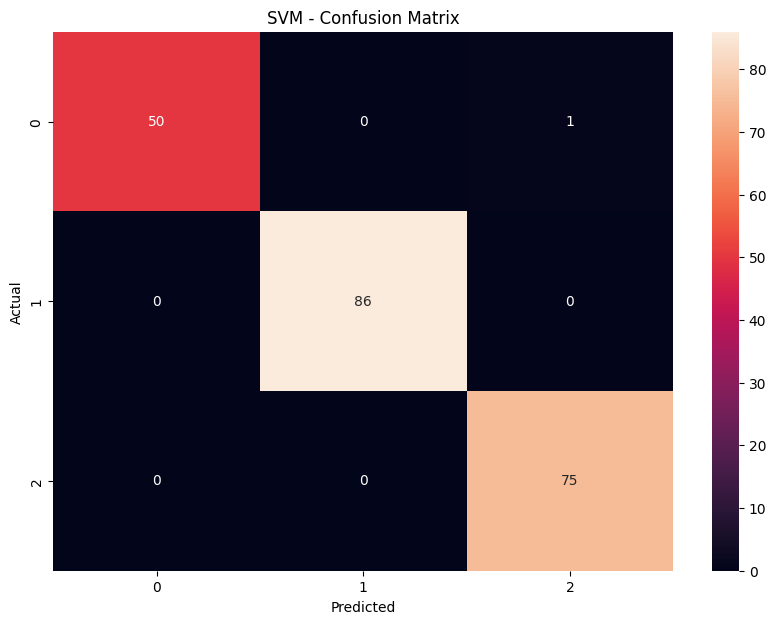

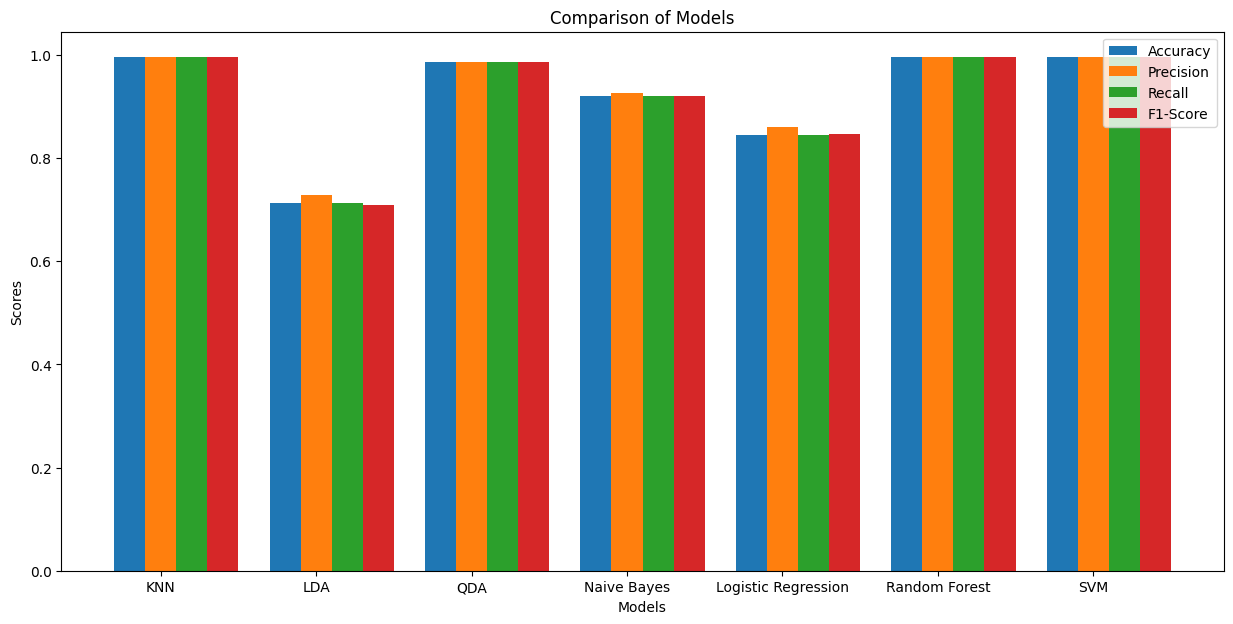

In [20]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('x_train_82.csv')
test_data = pd.read_csv('x_test_82.csv')

# Split the data into X (features) and y (target)
x_train = train_data.drop(['Grade', 'index'], axis=1)
y_train = train_data['Grade']
x_test = test_data.drop(['Grade', 'index'], axis=1)
y_test = test_data['Grade']

# Standard Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    #"Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# Define parameter grid for each model
param_grids = {
    "KNN": {'n_neighbors': list(range(1, 11)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "LDA": {},
    "QDA": {'reg_param': [i / 100.0 for i in range(101)]},
    "Naive Bayes": {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]},
    "Logistic Regression": {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [5000, 10000]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    #"Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'subsample': [0.6, 0.8, 1.0]},
    "SVM": {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
}

# Apply PCA for QDA
pca = PCA(n_components=0.93)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Function to train and evaluate a model
def train_eval_model(model_name, model, params, x_train, y_train, x_test, y_test):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

    # Plotting Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return accuracy, precision, recall, f1

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    x_train_used, x_test_used = (x_train_pca, x_test_pca) if model_name == "QDA" else (x_train_scaled, x_test_scaled)
    results[model_name] = train_eval_model(model_name, model, param_grids[model_name], x_train_used, y_train, x_test_used, y_test)

# Comparison chart for error types among methods
# Assuming 'results' is a dictionary with model names as keys and tuples (accuracy, precision, recall, f1) as values
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_values = {metric: [results[model][i] for model in results] for i, metric in enumerate(metrics)}

fig, ax = plt.subplots(figsize=(15, 7))
x = np.arange(len(results))
width = 0.2

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, metric_values[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models')
ax.set_xticks(x + width)
ax.set_xticklabels(results.keys())
ax.legend()

plt.show()


## Model Selection: 

### 1. KNN